# TensorFlow Classification

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [13]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

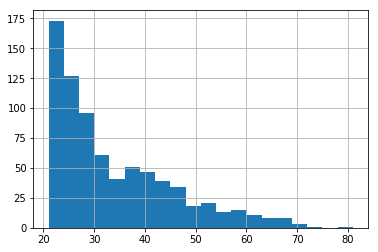

In [16]:
diabetes['Age'].hist(bins=20)

In [19]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [20]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [21]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Class', axis=1)

In [22]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
labels = diabetes['Class']

In [24]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [25]:
# LABELS

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

## Input Function

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqr85qy51', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9a6b50d5c0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpqr85qy51/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 391.155
INFO:tensorflow:loss = 4.41874, step = 101 (0.258 sec)
INFO:tensorflow:global_step/sec: 529.808
INFO:tensorflow:loss = 5.38901, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 519.548
INFO:tensorflow:loss = 5.91527, step = 301 (0.192 sec)
INFO:tensorflow:global_step/sec: 579.28
INFO:tensorflow:loss = 5.60407, step = 401 (0.175 sec)
INFO:tensorflow:global_step/sec: 531.699
INFO:tensorflow:loss = 4.5625, step = 501 (0.186 sec)
INFO:tensorflow:global_step/sec: 580.396
INFO:tensorflow:loss = 6.68635, step = 601 (0.173 sec)
INFO:tensorflow:global_step/sec: 566.289
INFO:tensorflow:loss = 7.19801, step = 701 (0.178 sec)
INFO:tensorflow:global_step/sec: 557.289
INFO:tensorflow:loss = 4.511, step = 801 (0.177 sec)
INFO:tensorflow:global_step/sec: 560.588
INFO:tensorflow:loss = 5.6174, step

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-05-21:09:15
INFO:tensorflow:Restoring parameters from /tmp/tmpqr85qy51/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-05-21:09:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.720472, accuracy_baseline = 0.65748, auc = 0.784431, auc_precision_recall = 0.620162, average_loss = 0.535714, global_step = 1000, label/mean = 0.34252, loss = 5.23352, prediction/mean = 0.379102


In [33]:
results

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7844311,
 'auc_precision_recall': 0.62016153,
 'average_loss': 0.53571415,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2335153,
 'prediction/mean': 0.37910208}

In [34]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [35]:
predictions = model.predict(pred_input_func)

In [36]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpqr85qy51/model.ckpt-1000


In [37]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53929621], dtype=float32),
  'logits': array([ 0.15750962], dtype=float32),
  'probabilities': array([ 0.46070382,  0.53929621], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.64333844], dtype=float32),
  'logits': array([ 0.58988351], dtype=float32),
  'probabilities': array([ 0.35666159,  0.64333844], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.39678597], dtype=float32),
  'logits': array([-0.4188751], dtype=float32),
  'probabilities': array([ 0.60321403,  0.39678597], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.32796016], dtype=float32),
  'logits': array([-0.71742547], dtype=float32),
  'probabilities': array([ 0.67203981,  0.32796016], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi6ulopkc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9a59554828>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
# dnn_model.train(input_fn = input_func, steps = 1000)

In [40]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [41]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpun6frrqf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9a6afdeb38>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpun6frrqf/model.ckpt.
INFO:tensorflow:loss = 9.55567, step = 1
INFO:tensorflow:global_step/sec: 354.444
INFO:tensorflow:loss = 3.95948, step = 101 (0.285 sec)
INFO:tensorflow:global_step/sec: 411.209
INFO:tensorflow:loss = 5.39147, step = 201 (0.242 sec)
INFO:tensorflow:global_step/sec: 289.458
INFO:tensorflow:loss = 5.00596, step = 301 (0.346 sec)
INFO:tensorflow:global_step/sec: 387.004
INFO:tensorflow:loss = 5.10481, step = 401 (0.260 sec)
INFO:tensorflow:global_step/sec: 360.177
INFO:tensorflow:loss = 2.43294, step = 501 (0.277 sec)
INFO:tensorflow:global_step/sec: 403.602
INFO:tensorflow:loss = 4.98382, step = 601 (0.248 sec)
INFO:tensorflow:global_step/sec: 458.821
INFO:tensorflow:loss = 6.48173, step = 701 (0.216 sec)
INFO:tensorflow:global_step/sec: 456.233
INFO:tensorflow:loss = 3.03321, step = 801 (0.219 sec)
INFO:tensorflow:global_step/sec: 424.141
INFO:tensorflow:loss = 2.52988,

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-05-21:29:18
INFO:tensorflow:Restoring parameters from /tmp/tmpun6frrqf/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-05-21:29:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.740157, accuracy_baseline = 0.65748, auc = 0.82824, auc_precision_recall = 0.700429, average_loss = 0.480409, global_step = 1000, label/mean = 0.34252, loss = 4.69322, prediction/mean = 0.354777


{'accuracy': 0.74015749,
 'accuracy_baseline': 0.65748036,
 'auc': 0.82824004,
 'auc_precision_recall': 0.70042861,
 'average_loss': 0.48040876,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.693224,
 'prediction/mean': 0.35477659}